<a href="https://colab.research.google.com/github/sakhnos/Wabs-Wsc/blob/master/Wabs(t).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

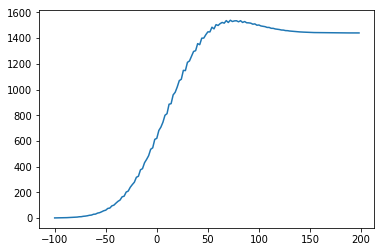

In [13]:
%reset -f 
import numpy as np
import math
from scipy.integrate import odeint
#from numpy import linspace, array
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter  


def EGauss(t, w0, tau, E0, phi):
  return E0 * np.exp(-t ** 2 / (2 * tau ** 2)) * np.cos(w0*t + phi)


def IntSquared(t, w, w0, tau, E0, phi):
  tt = np.arange(-2000, t, 1)                # Small step rises time of calculation extremly! 
  Jn = np.zeros(len(tt), dtype = np.complex64)  # https://docs.scipy.org/doc/numpy/user/basics.types.html       np.csingle
  for i in range(len(Jn)):
    Jn[i] = np.exp(1j * w * tt[i]) * EGauss(tt[i], w0, tau, E0, phi)
  integral = np.trapz(Jn, tt)
  return (np.abs(integral)) ** 2

def IntSquared_visualisation():
  t = np.arange(-100, 200, 2)
  JJ = np.zeros(len(t))
  w = 2.48
  w0 = 2.46
  tau = 48
  E0 = 1
  phi = 0
  for i in range(len(JJ)):
    JJ[i] = IntSquared(t[i], w, w0, tau, E0, phi)
  plt.plot(t, JJ)
  plt.show()
IntSquared_visualisation() 
                 

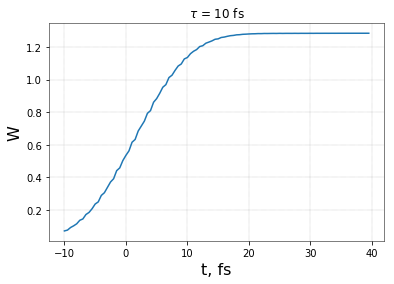

In [10]:

aB = 0.052 # Bohr's radius in nm
c = 137    # speed of light, at. u.
### PLASMON's parameters (Na8-cluster) ######
wp = 2.48 / 27.2 # eV, resonant freq of plasmon Na8
G = 0.248 / 27.2 # gamma Na8, q = 10
R = 0.4 / aB     # radius of cluster, nm
#############################################

def alpha(w, wp, R, G):   # dynamic polarizability
  a = R ** 3 * wp ** 2 / (wp ** 2 - w ** 2 - 1j * w * G)
  return a

def sigma_abs(w, wp, R, G):
  cross_abs = 4 * np.pi * w * np.imag(alpha(w, wp, R, G)) / c   # Optical theorem, p. 184 VA
  return  cross_abs 

def cross_visualisation():
    w = np.arange(0, 6, 0.01) / 27.2
    sigma = np.zeros(len(w))
    for i in range (len(w)):
       sigma[i] = sigma_abs(w[i], wp, R, G)
    plt.plot(w * 27.2, sigma)
    plt.show()
    
def Gauss_visualisation():
    t = np.arange(-20, 20, 0.1)
    w0 = 2.4
    tau = 2    
    sigma = np.zeros(len(t))
    for i in range (len(t)):
       sigma[i] = EGauss(t[i], w0, tau, 1, 0)
    plt.plot(t, sigma)
    plt.show()
     
#Gauss_visualisation()    
#cross_visualisation() 

def W(t, tau, w0, E0, phi):
  ww = np.arange(0.1, 5, 0.1) / 27.2
  J = np.zeros(len(ww))
  for i in range (len(ww)):
    J[i] = sigma_abs(ww[i], wp, R, G) * IntSquared(t / 0.024, ww[i],  w0 / 27.2, tau / 0.024, E0, phi) / ww[i] 
  integral =  (c / (4 * np.pi ** 2) ) * np.trapz(J, ww)   
  return integral 

def W_visualisation():            
  t = np.arange(-10, 40, 0.5) # abscissa, fs         
  Wabs = np.zeros(len(t)) 
  tau =10                   # pulses's duration, fs
  E0 = 10 ** -3              # electric field strength, at. u.
  phi = 0                     
  w0 = 2.42                  # GP carrier frequency
  # plasmon's parameters see above
  for i in range (len(t)):
       Wabs[i] = W(t[i], tau, w0, E0, phi)
  fig = plt.figure()
  fig.patch.set_facecolor('xkcd:white') # outer color        
  plt.plot(t, Wabs)   
  ax = plt.gca()
  ax.set_facecolor((1.0, 1.0, 1.0))    # background color
  ax.spines['bottom'].set_linewidth(0.5)
  ax.spines['bottom'].set_color('0.0') 
  ax.spines['top'].set_linewidth(0.5)
  ax.spines['top'].set_color('0.0') 
  ax.spines['left'].set_linewidth(0.5)
  ax.spines['left'].set_color('0.0') 
  ax.spines['right'].set_linewidth(0.5)
  ax.spines['right'].set_color('0.0') 
  ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
  plt.xlabel(r't, fs',  {'color': 'k', 'fontsize': 16})
  plt.ylabel(r'W', {'color': 'k', 'fontsize': 16})
  plt.title(r'$\tau$ = ' + str(tau) + " fs") 
  plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
  plt.show()
          
W_visualisation()    